## MARKETING DATA ANALYSIS

by Jane Oghomhen Ebole

## Project Overview

This project focuses on Customer Segmentation and Analysis to better understand customer behavior and optimize marketing strategies. Using a dataset of customer demographics, purchasing habits, and interactions, we aim to segment customers into meaningful groups and uncover actionable insights

### Goal

- Increase **Customer Retention** by identifying at-risk customers and re-engaging them with tailored offers.
- Boost **Revenue and Lifetime Value (LTV)** by targeting high-value customer segments with personalized campaigns.
- Optimize **Marketing Strategies** by better understanding customer preferences and prioritizing the most profitable segments.
- Improve **Resource Allocation** by focusing efforts on segments that provide the highest ROI.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings


# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
#Read in the dataset

df = pd.read_csv(r'C:\Users\USER\Downloads\superstore_data.csv')

In [3]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [4]:
df.tail()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,1/9/2012,99,169,...,188,0,144,1,8,5,4,7,1,0


## Date Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# Count the number of unique campaigns in the dataset
unique_id = df['Id'].nunique()

print(f'Number of unique  Id  in the dataset: {unique_id}')

Number of unique  Id  in the dataset: 2240


In [7]:
#change the date column to date format

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [8]:
# Create an Age column
df['Age'] = 2014 - df['Year_Birth']

In [9]:
# Handle missing income values
df['Income'].fillna(df['Income'].median(), inplace=True)

## Exploratory Data Analysis

In [10]:
categorical_columns = ['Education', 'Marital_Status']
other_columns =['Id', 'Dt_Customer']
numerical_columns = [col for col in df.columns if col not in categorical_columns and col not in other_columns]

print(numerical_columns) 

['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain', 'Age']


In [11]:
# Calculate summary statistics for numerical columns
summary_stats = df[numerical_columns].describe()

# Print the results
print("Summary Statistics:")
print(summary_stats.T)

Summary Statistics:
                      count          mean           std     min       25%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2240.0  52237.975446  25037.955891  1730.0  35538.75   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238 

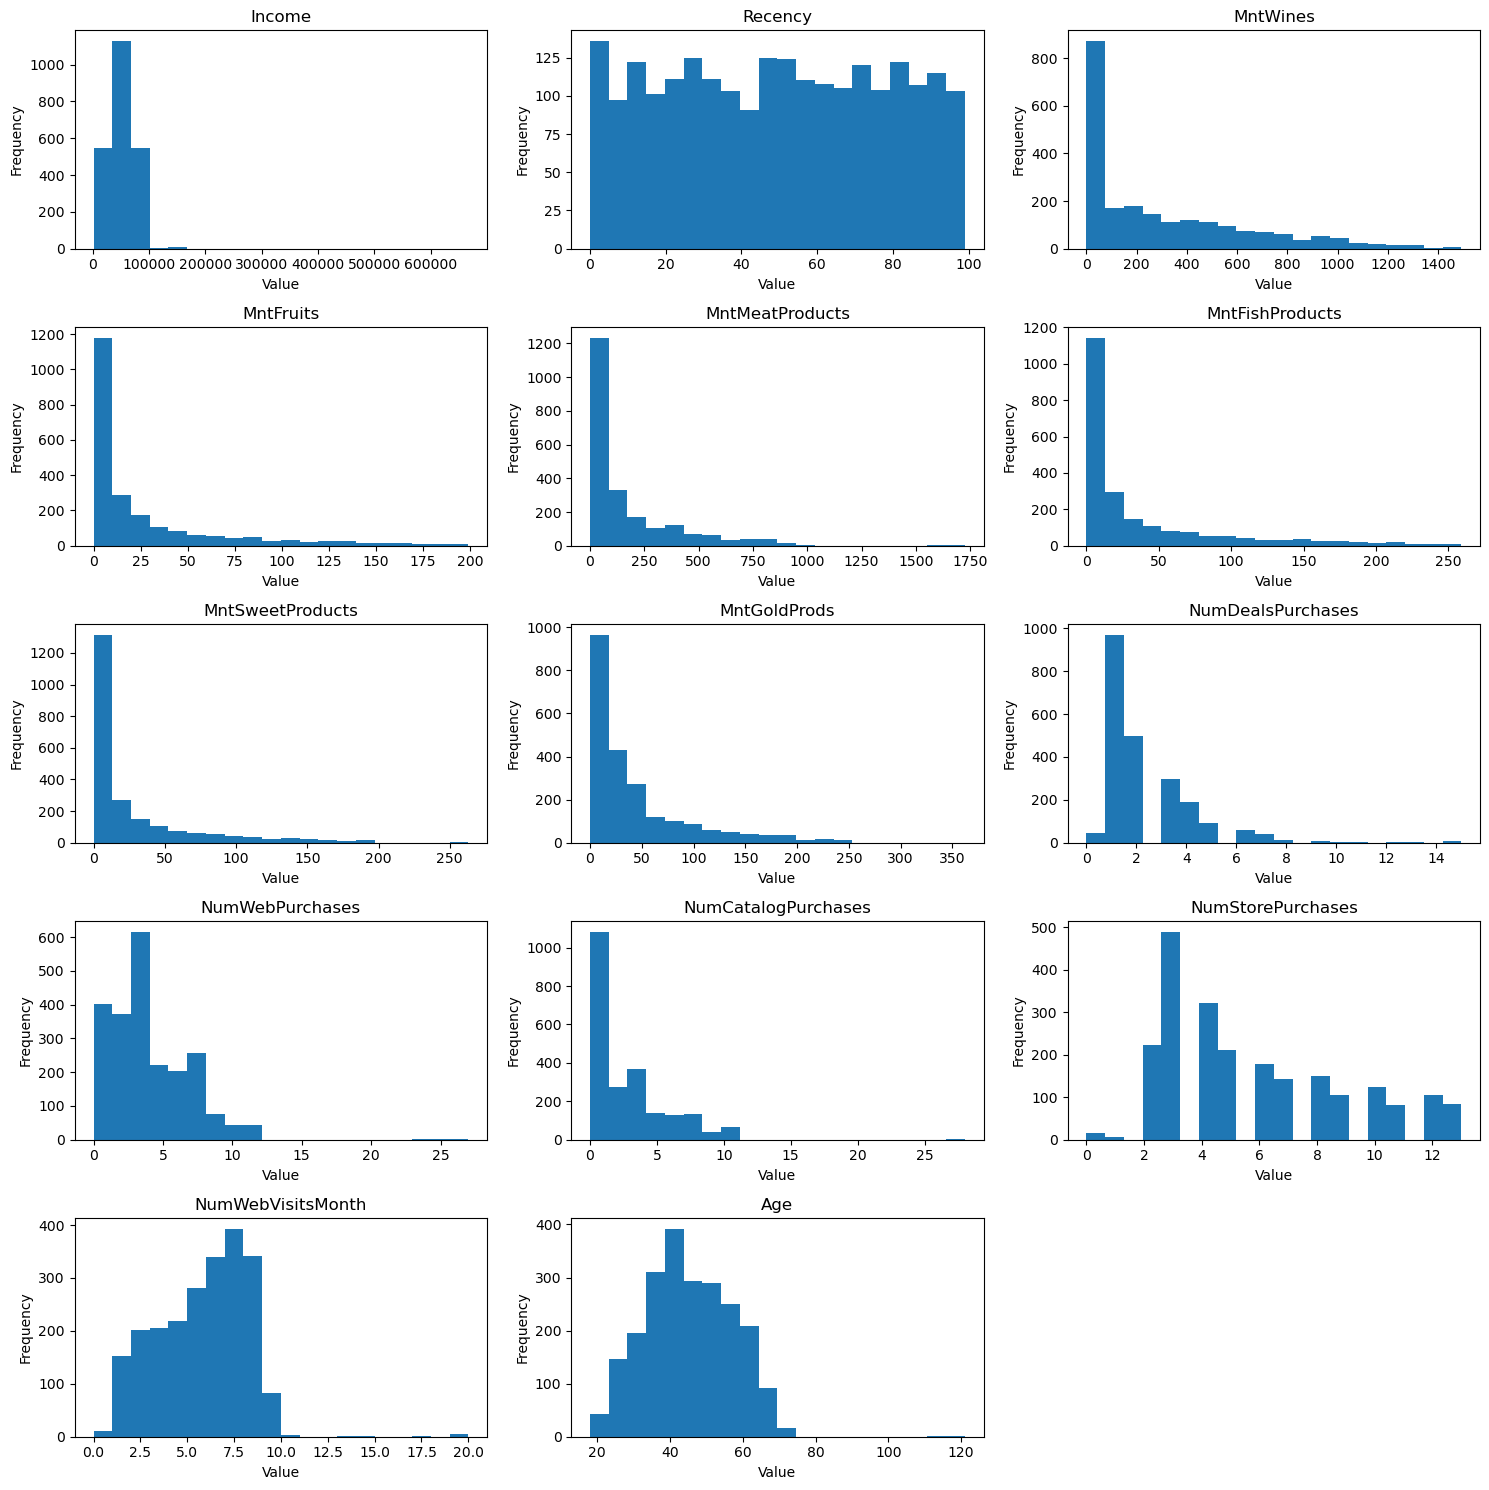

In [12]:
# List of columns to plot
columns = [
    'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth', 'Age']


# Plot histograms for each column
plt.figure(figsize=(15, 15))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 3, i) 
    plt.hist(df[column].dropna(), bins=20)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

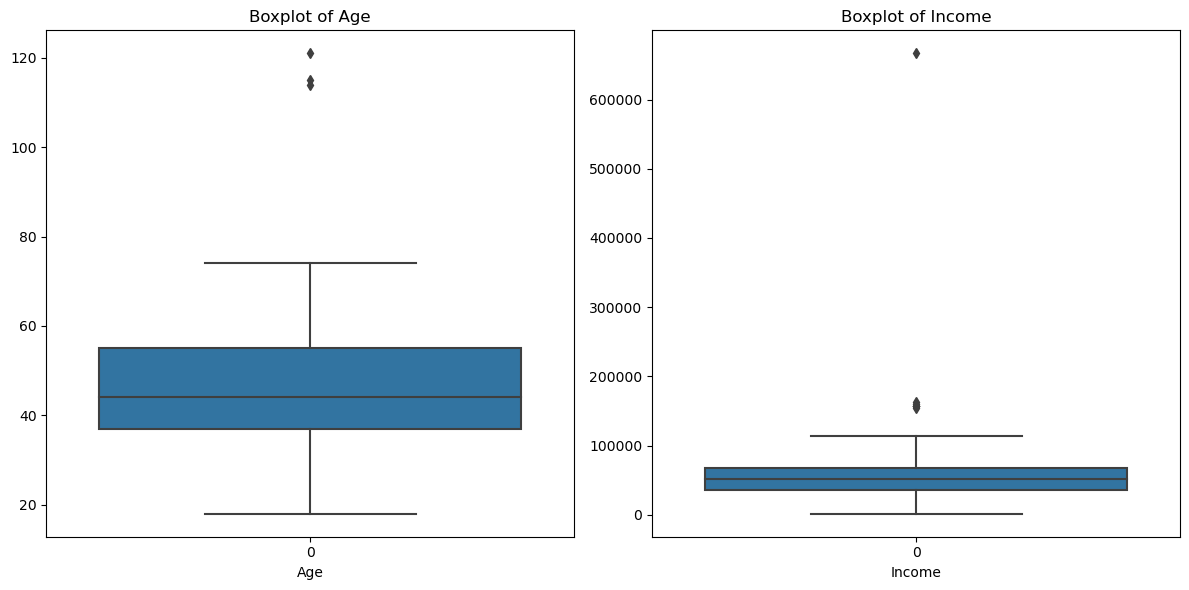

In [13]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for Age
sns.boxplot(df['Age'], ax=axes[0])
axes[0].set_title('Boxplot of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('')

# Boxplot for Income
sns.boxplot(df['Income'], ax=axes[1])
axes[1].set_title('Boxplot of Income')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('')

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
# Calculate the 90th percentile for Age and Income
age_threshold = df['Age'].quantile(0.9)
income_threshold = df['Income'].quantile(0.9)

# Filter out rows with Age or Income above the threshold
df_filtered = df[(df['Age'] <= age_threshold) & (df['Income'] <= income_threshold)]

# Print the number of rows removed
print(f"Removed {len(df) - len(df_filtered)} rows")

# Update the original DataFrame
df = df_filtered

Removed 380 rows


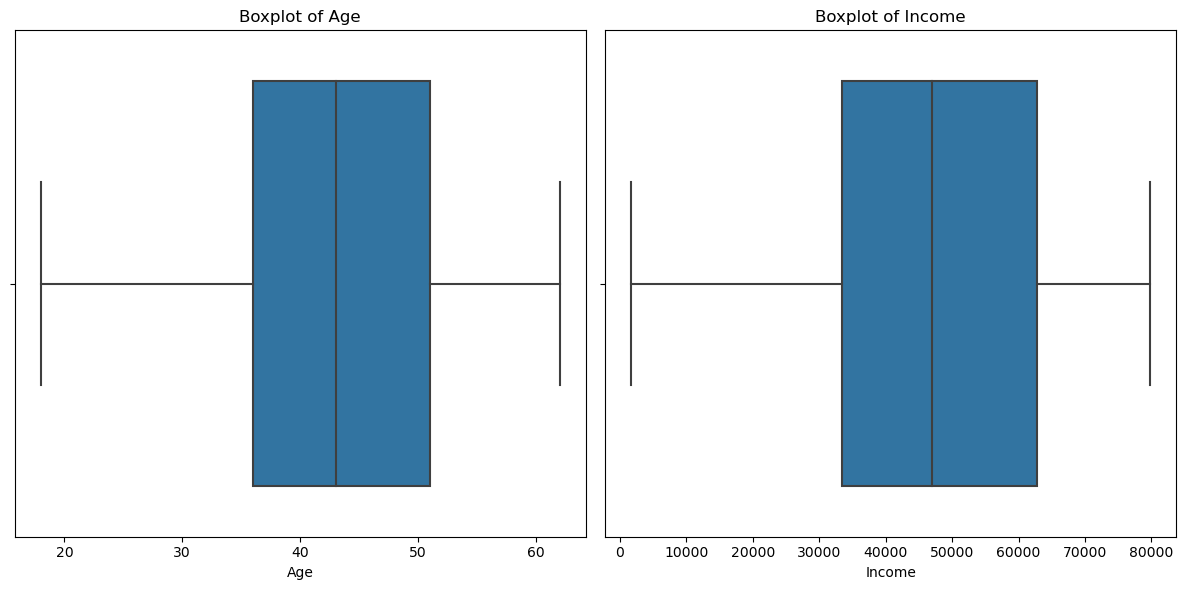

In [15]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for Age
sns.boxplot(x=df['Age'], ax=axes[0])
axes[0].set_title('Boxplot of Age')
axes[0].set_xlabel('Age')

# Boxplot for Income
sns.boxplot(x=df['Income'], ax=axes[1])
axes[1].set_title('Boxplot of Income')
axes[1].set_xlabel('Income')

# Show the plot
plt.tight_layout()
plt.show()

## Demograhics
Age Distribution

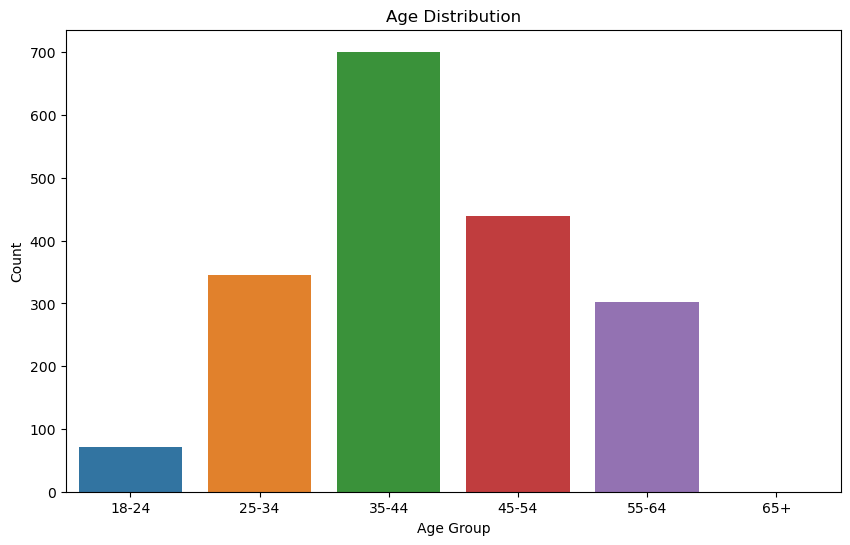

In [16]:
df['Age_Group'] = pd.cut(df['Age'], 
                             bins=[18, 25, 35, 45, 55, 65, 100], 
                             labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'], 
                             include_lowest=True)

# Plot age distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', data=df)
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

Frequency Distribution of Education:
Education
Graduation    960
PhD           374
Master        296
2n Cycle      178
Basic          52
Name: count, dtype: int64


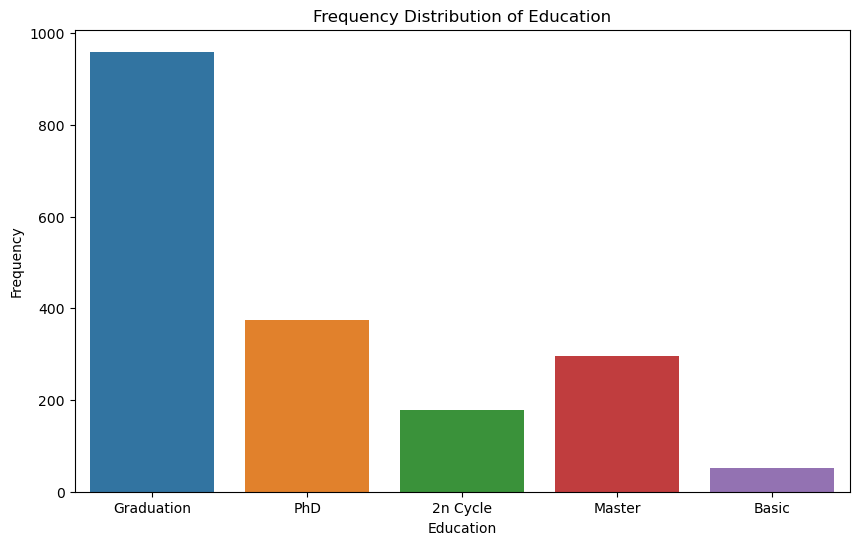

Frequency Distribution of Marital_Status:
Marital_Status
Married     730
Together    480
Single      402
Divorced    194
Widow        47
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64


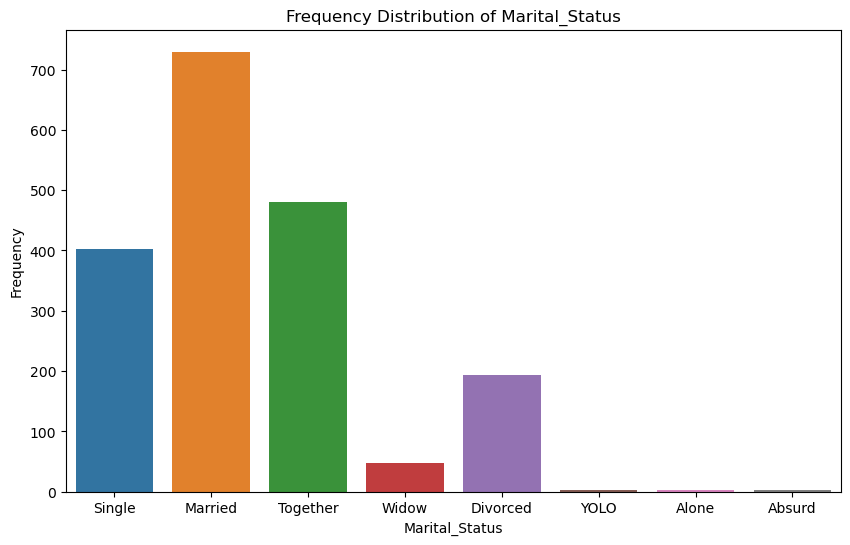

In [17]:
# Get the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Loop through each categorical column
for col in categorical_cols:
    # Get the unique values in the column
    unique_values = df[col].unique()
    
    # Print the frequency distribution of the column
    print(f"Frequency Distribution of {col}:")
    print(df[col].value_counts())
    
    # Plot a bar chart of the frequency distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f"Frequency Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
   

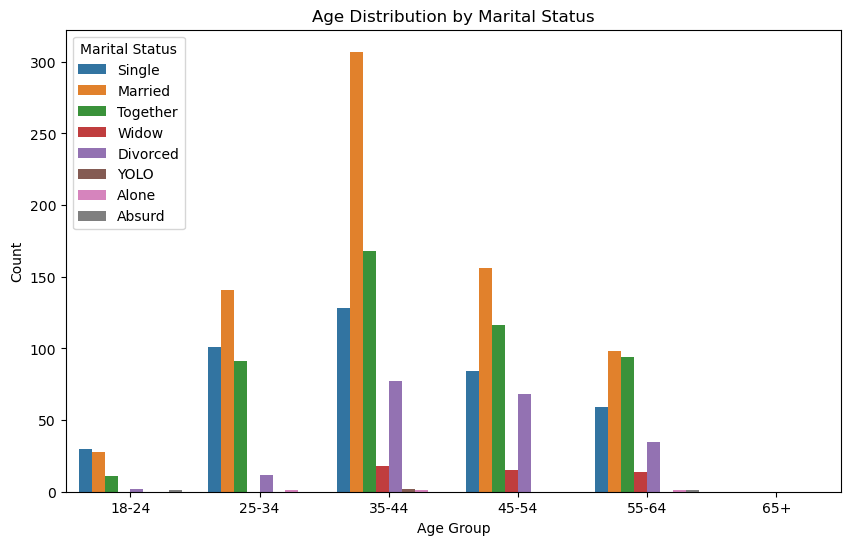

In [18]:
# Use the seaborn library to create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='Marital_Status', data=df)
plt.title('Age Distribution by Marital Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.show()

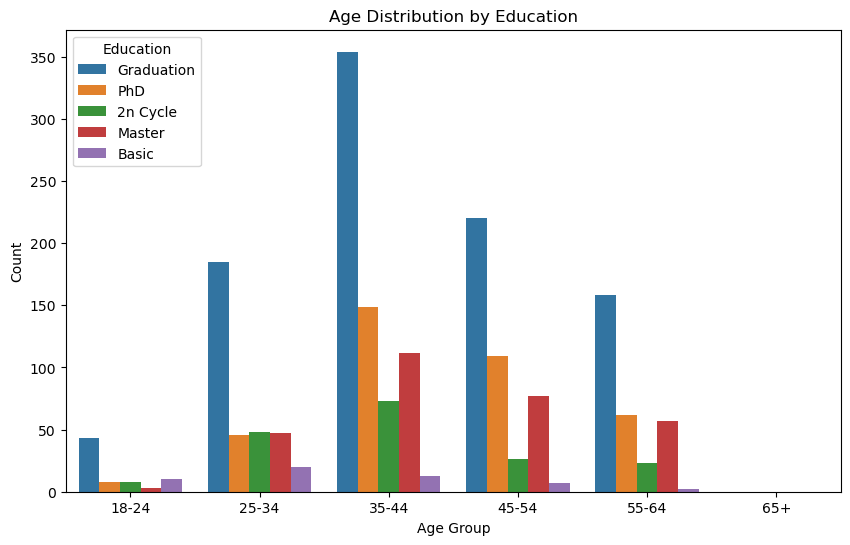

In [19]:
# Use the seaborn library to create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', hue='Education', data=df)
plt.title('Age Distribution by Education')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Education')
plt.show()

## Spending Pattern

In [20]:
# Total Spending per customer
df['Total_Spending'] = (
    df['MntWines'] + 
    df['MntFruits'] + 
    df['MntMeatProducts'] + 
    df['MntFishProducts'] + 
    df['MntSweetProducts'] + 
    df['MntGoldProds']
)
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Age_Group,Total_Spending
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,1,7,3,7,5,1,0,53,45-54,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,1,3,2,5,2,0,0,56,55-64,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,1,1,0,2,7,0,0,47,45-54,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,2,3,1,2,7,1,0,25,18-24,91
5,7348,1958,PhD,Single,71691.0,0,0,2014-03-17,0,336,...,1,4,7,5,2,1,0,56,55-64,1192


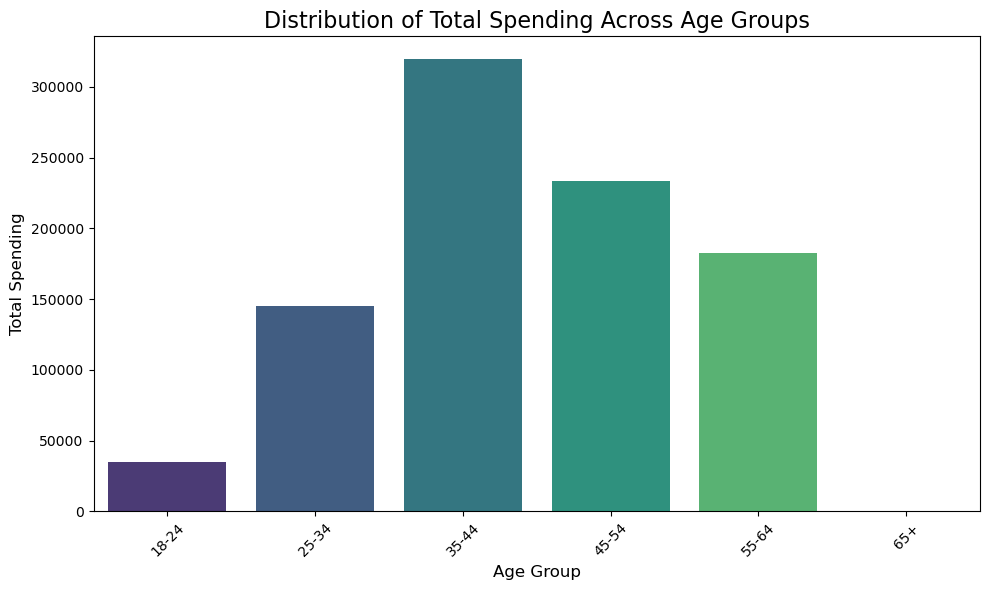

In [21]:
# Group data by Age Group and calculate total spending for each group
age_spending_distribution = df.groupby('Age_Group')['Total_Spending'].sum().reset_index()

# Visualization: Bar chart for total spending by age group
plt.figure(figsize=(10, 6))
sns.barplot(data=age_spending_distribution, x='Age_Group', y='Total_Spending', palette='viridis')
plt.title('Distribution of Total Spending Across Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


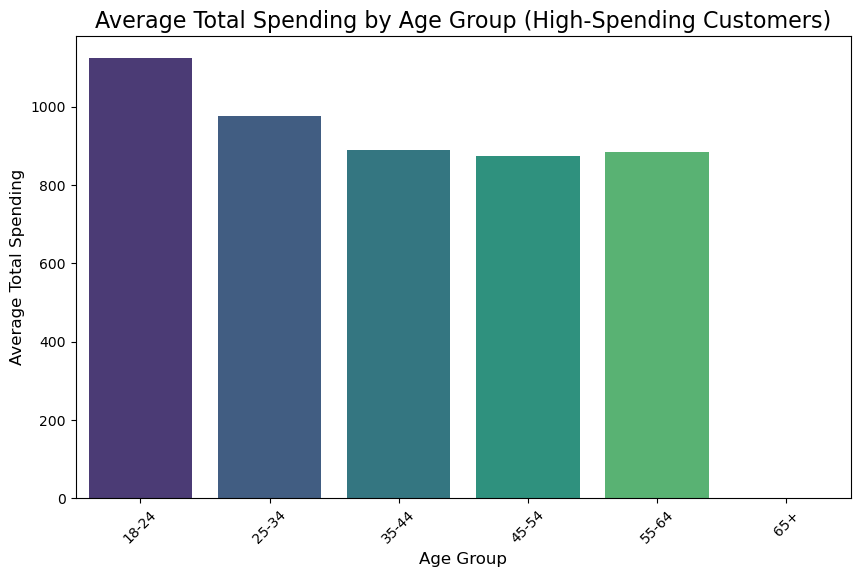

In [22]:
# Set a threshold to define "high-spending" customers
high_spending_threshold = df['Total_Spending'].quantile(0.50)  # Top 50% spenders

# Segment high-spending customers
high_spenders = df[df['Total_Spending'] >= high_spending_threshold]

# Analyze Total Spending by Age Group
age_group_spending = high_spenders.groupby('Age_Group')['Total_Spending'].mean().sort_values(ascending=False)


# Visualization for Spending by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_spending.index, y=age_group_spending.values, palette='viridis')
plt.title('Average Total Spending by Age Group (High-Spending Customers)', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Total Spending', fontsize=12)
plt.xticks(rotation=45)
plt.show()

The summary reveals that customers between the ages of 18-34, who represent a relatively small proportion of our total customer base, account for the majority of high spenders. In contrast, customers between the ages of 35-54 make up the largest proportion of our customer base, but tend to have lower spending habits

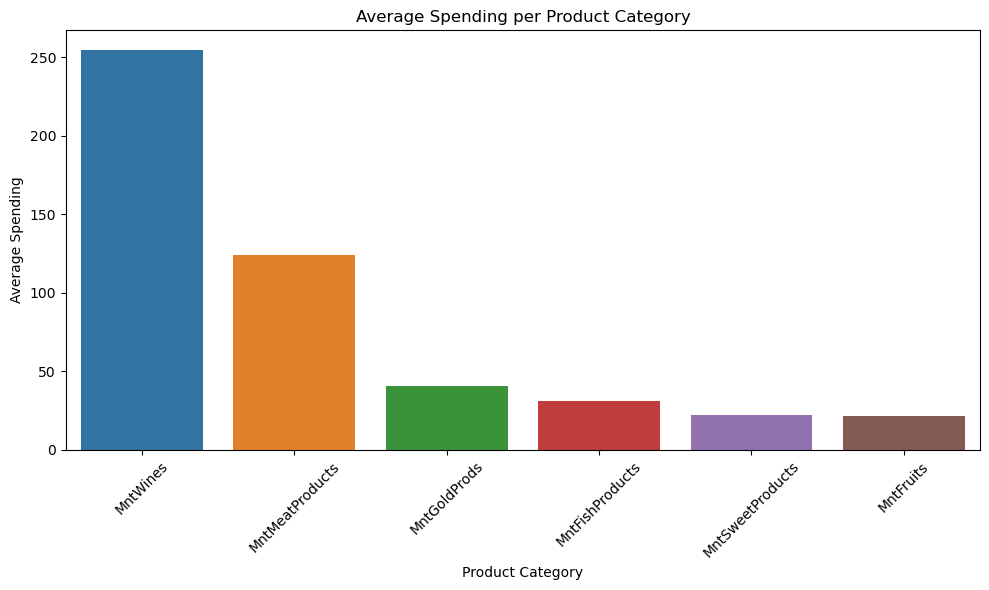

In [23]:
# Calculate average spending per product category
product_spending = df[[
    'MntWines', 'MntFruits', 'MntMeatProducts', 
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean().sort_values(ascending=False)


# Plot the average spending per product category
plt.figure(figsize=(10,6))
sns.barplot(x=product_spending.index, y=product_spending.values)
plt.title('Average Spending per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

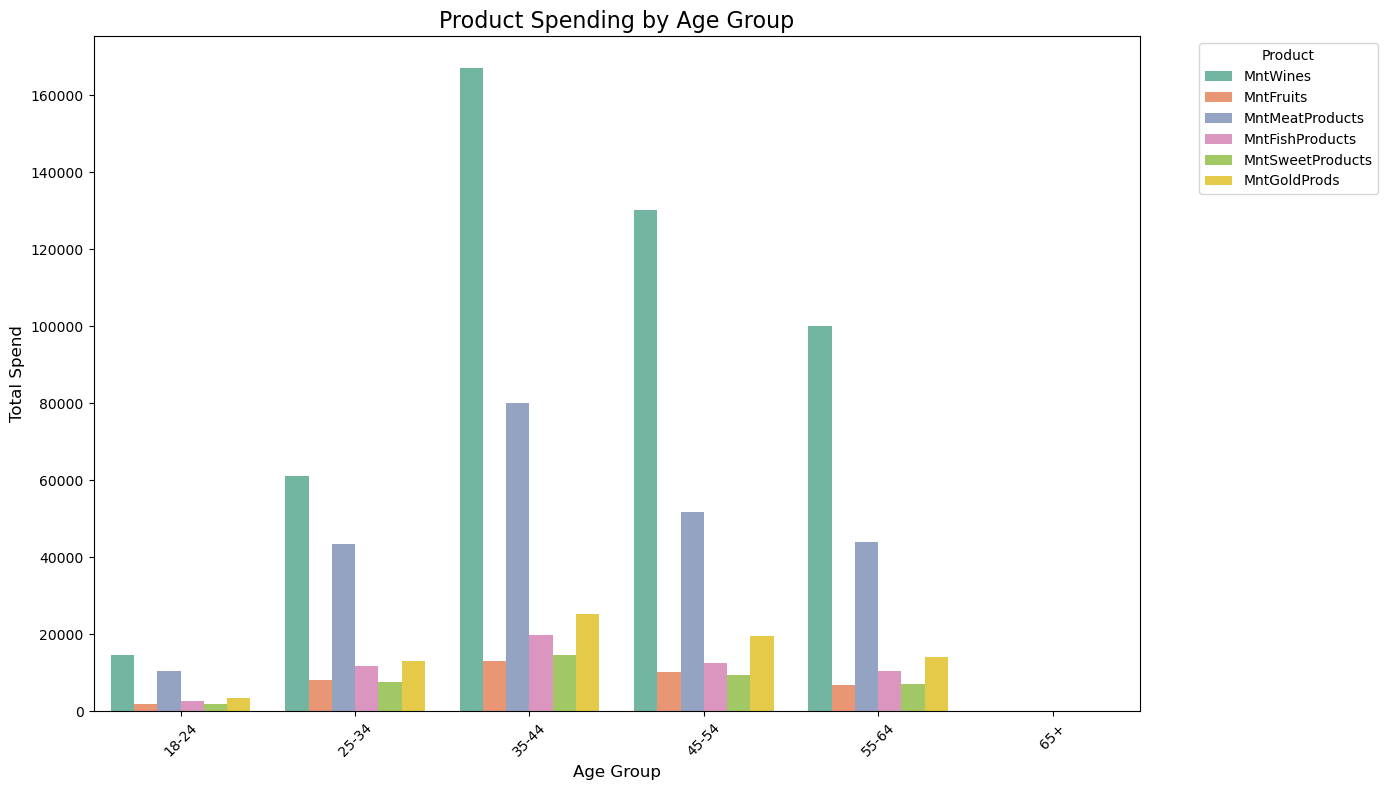

In [24]:
# Aggregate total spending per product by age group
age_product_usage = df.groupby('Age_Group')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Reset index for plotting
age_product_usage = age_product_usage.reset_index()

# Melt data for easier visualization
melted_data = age_product_usage.melt(id_vars='Age_Group', var_name='Product', value_name='Total Spend')

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=melted_data, x='Age_Group', y='Total Spend', hue='Product', palette='Set2')
plt.title('Product Spending by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Spend', fontsize=12)
plt.legend(title='Product', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Customers seem to be spending significantly more on alcoholic wines than other product categories.Product categories like meat products, gold, and fish products are moderately popular, while sweet products and fruits are less favored in terms of spending.

Wine, meat and gold are the most popular product across all age groups, with particularly high spending from those aged.

This product categories have the highest potential for revenue and highlight areas where marketing campaigns might need to focus more

## Channel Usage 

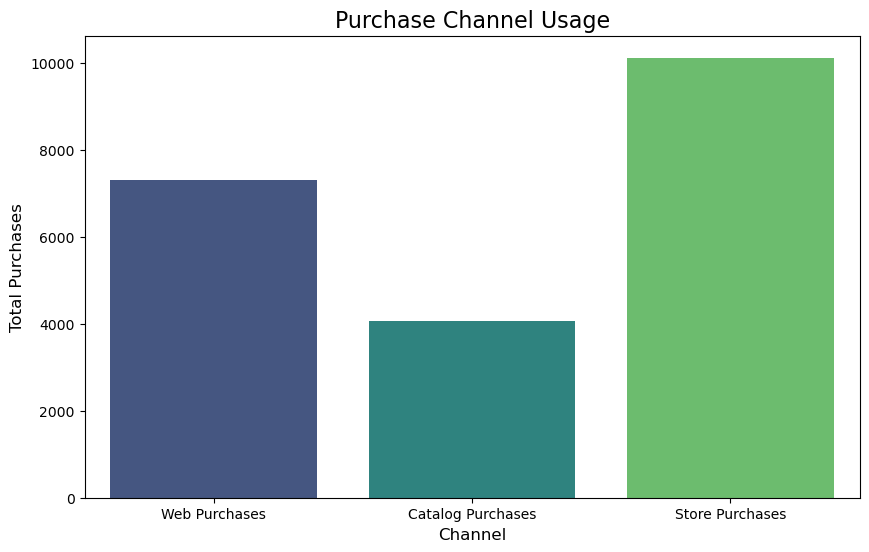

Channel:
             Channel  Total Purchases
0      Web Purchases             7308
1  Catalog Purchases             4063
2    Store Purchases            10129


In [25]:
# Summing up the values for each channel
channel_data = {
    'Web Purchases': df['NumWebPurchases'].sum(),
    'Catalog Purchases': df['NumCatalogPurchases'].sum(),
    'Store Purchases': df['NumStorePurchases'].sum()
}

# Converting to a DataFrame for better visualization
channel_df = pd.DataFrame(list(channel_data.items()), columns=['Channel', 'Total Purchases'])

# Plotting the channel usage
plt.figure(figsize=(10, 6))
sns.barplot(data=channel_df, x='Channel', y='Total Purchases', palette='viridis')
plt.title('Purchase Channel Usage', fontsize=16)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Total Purchases', fontsize=12)
plt.show()

# Print the most popular channel
print("Channel:")
print(channel_df)

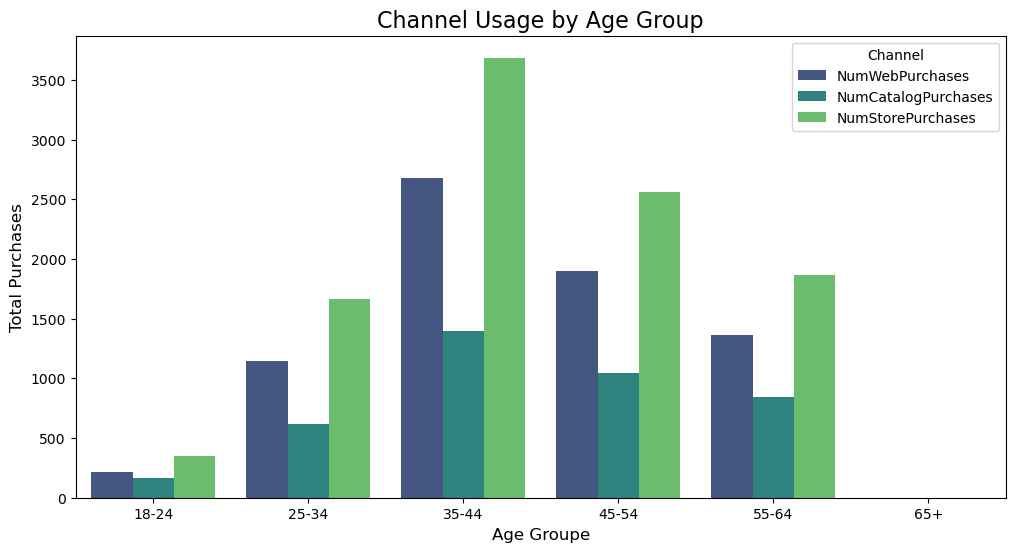

Most used channel for each age group:
NumWebPurchases        35-44
NumCatalogPurchases    35-44
NumStorePurchases      35-44
dtype: object


In [26]:
# Summing purchases per channel for each age range
age_channel_usage = df.groupby('Age_Group')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()

# Melt the data for easier plotting
age_channel_usage_melted = age_channel_usage.reset_index().melt(id_vars='Age_Group', 
                                                                var_name='Channel', 
                                                                value_name='Total Purchases')

# Plot the channel usage by age range
plt.figure(figsize=(12, 6))
sns.barplot(data=age_channel_usage_melted, x='Age_Group', y='Total Purchases', hue='Channel', palette='viridis')
plt.title('Channel Usage by Age Group', fontsize=16)
plt.xlabel('Age Groupe', fontsize=12)
plt.ylabel('Total Purchases', fontsize=12)
plt.legend(title='Channel')
plt.show()

# Display the age range with the most purchases for each channel
most_used_channel_per_age = age_channel_usage.idxmax()
print("Most used channel for each age group:")
print(most_used_channel_per_age)

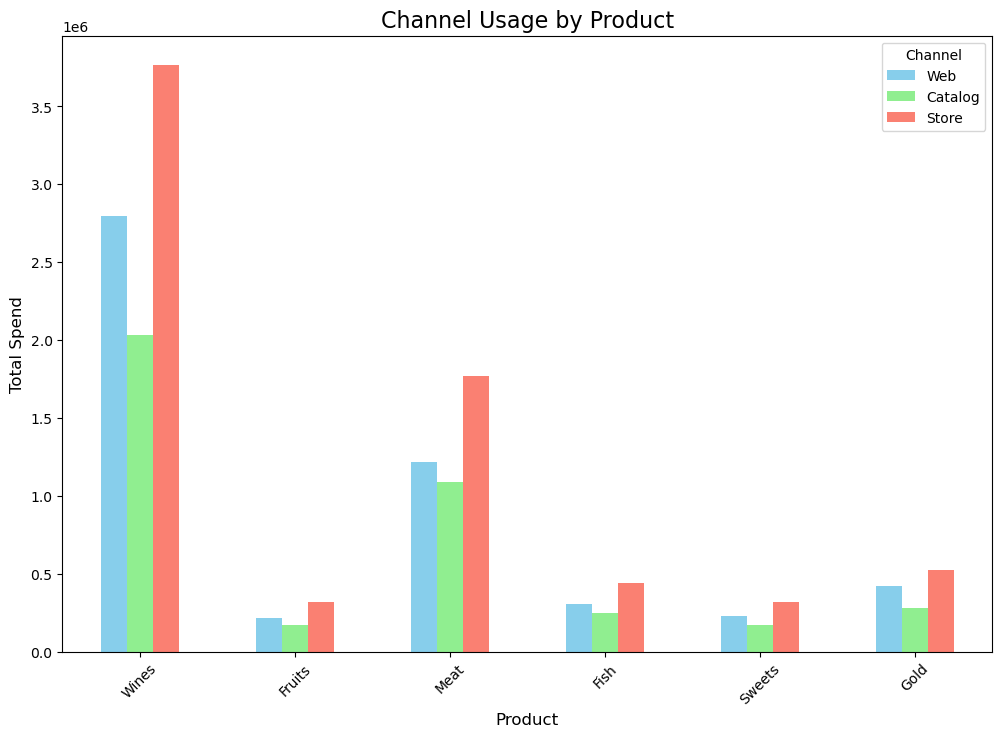

In [27]:
# Calculate channel usage for each product
channel_product_usage = pd.DataFrame({
    'Web': [
        (df['MntWines'] * df['NumWebPurchases']).sum(),
        (df['MntFruits'] * df['NumWebPurchases']).sum(),
        (df['MntMeatProducts'] * df['NumWebPurchases']).sum(),
        (df['MntFishProducts'] * df['NumWebPurchases']).sum(),
        (df['MntSweetProducts'] * df['NumWebPurchases']).sum(),
        (df['MntGoldProds'] * df['NumWebPurchases']).sum()
    ],
    'Catalog': [
        (df['MntWines'] * df['NumCatalogPurchases']).sum(),
        (df['MntFruits'] * df['NumCatalogPurchases']).sum(),
        (df['MntMeatProducts'] * df['NumCatalogPurchases']).sum(),
        (df['MntFishProducts'] * df['NumCatalogPurchases']).sum(),
        (df['MntSweetProducts'] * df['NumCatalogPurchases']).sum(),
        (df['MntGoldProds'] * df['NumCatalogPurchases']).sum()
    ],
    'Store': [
        (df['MntWines'] * df['NumStorePurchases']).sum(),
        (df['MntFruits'] * df['NumStorePurchases']).sum(),
        (df['MntMeatProducts'] * df['NumStorePurchases']).sum(),
        (df['MntFishProducts'] * df['NumStorePurchases']).sum(),
        (df['MntSweetProducts'] * df['NumStorePurchases']).sum(),
        (df['MntGoldProds'] * df['NumStorePurchases']).sum()
    ]
}, index=['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'])

# Plot channel usage against products
channel_product_usage.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Channel Usage by Product', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Spend', fontsize=12)
plt.legend(title='Channel', fontsize=10)
plt.xticks(rotation=45)
plt.show()


## Engagement 

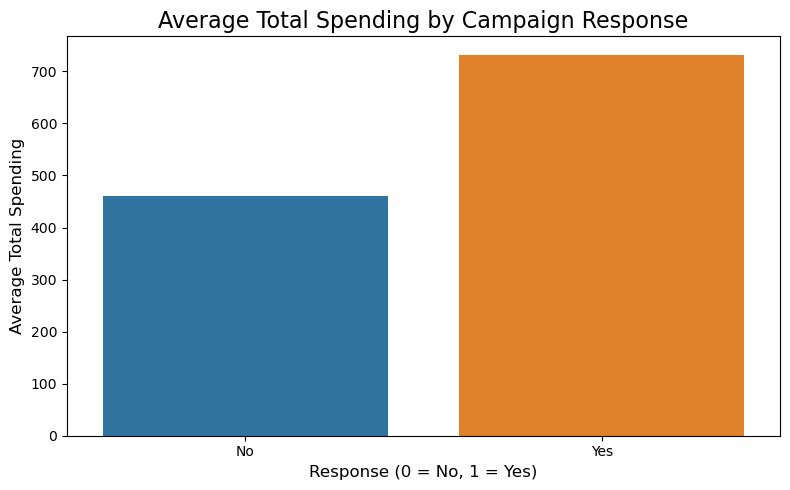

   Response  Avg_Total_Spending
0         0          459.918093
1         1          730.830357


In [28]:
# Group data by Response and calculate average total spending
engagement_analysis = df.groupby('Response')['Total_Spending'].mean().reset_index()
engagement_analysis.columns = ['Response', 'Avg_Total_Spending']

# Visualization: Bar chart for average spending by response
plt.figure(figsize=(8, 5))
sns.barplot(data=engagement_analysis, x='Response', y='Avg_Total_Spending')
plt.title('Average Total Spending by Campaign Response', fontsize=16)
plt.xlabel('Response (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Average Total Spending', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Print the summary for reference
print(engagement_analysis)

Customers who engaged with the campaign (respondents) spend significantly more on average compared to non-respondents. The difference in spending is approximately 270.91 this indicates that customers who engage with the campaign are likely more valuable in terms of spending behavior.

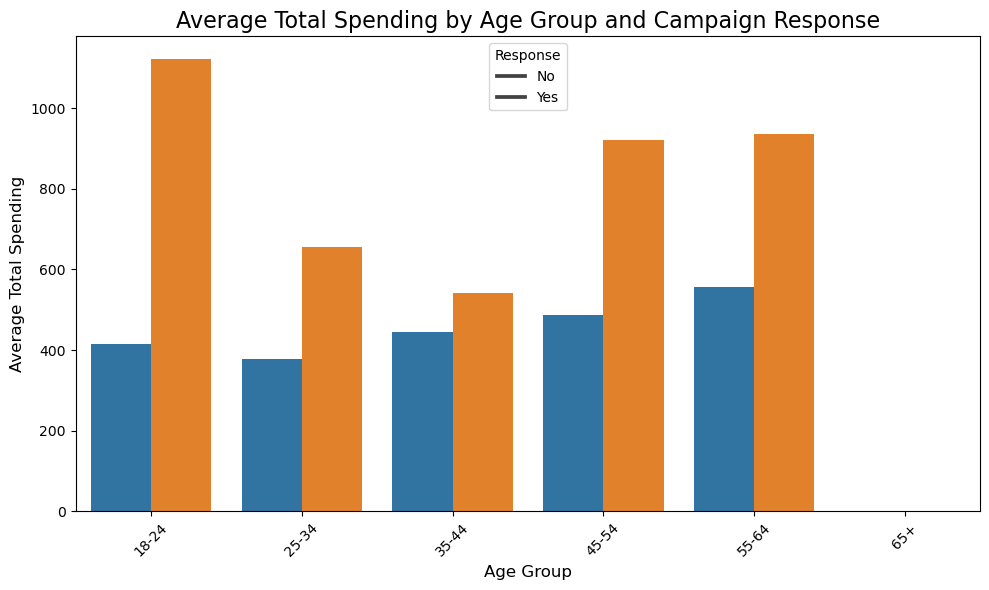

   Age Group  Response  Avg_Total_Spending
0      18-24         0          415.784615
1      18-24         1         1122.285714
2      25-34         0          377.367347
3      25-34         1          655.480769
4      35-44         0          445.158065
5      35-44         1          541.111111
6      45-54         0          488.055838
7      45-54         1          920.644444
8      55-64         0          555.749049
9      55-64         1          936.051282
10       65+         0                 NaN
11       65+         1                 NaN


In [28]:
# Group data by Age Group and Response, then calculate average total spending
age_group_response_analysis = df.groupby(['Age_Group', 'Response'])['Total_Spending'].mean().reset_index()
age_group_response_analysis.columns = ['Age Group', 'Response', 'Avg_Total_Spending']

# Visualization: Bar chart for average spending by age group and response
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_response_analysis, x='Age Group', y='Avg_Total_Spending', hue='Response')
plt.title('Average Total Spending by Age Group and Campaign Response', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Total Spending', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Response', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Print the summary for reference
print(age_group_response_analysis)


## SEGMENTATION ANALYSIS

## RFM Analysis

In [31]:
# Calculate RFM metrics
df['Frequency'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)


# Calculate RFM quartiles
df['R_Quartile'] = pd.qcut(df['Recency'], 4, labels=[4, 3, 2, 1])
df['F_Quartile'] = pd.qcut(df['Frequency'], 4, labels=[1, 2, 3, 4])
df['M_Quartile'] = pd.qcut(df['Total_Spending'], 4, labels=[1, 2, 3, 4])

# Create RFM Score
df['RFM_Score'] = df['R_Quartile'].astype(int) + df['F_Quartile'].astype(int) + df['M_Quartile'].astype(int)


In [32]:
df.groupby('RFM_Score').agg({    
    'Frequency': 'mean',
    'Recency': 'mean',
    'Total_Spending': ['mean', 'count']  
}).round(1)

Frequency Recency Total_Spending      
               mean    mean           mean count
RFM_Score                                       
3               5.3    86.5           36.6    96
4               6.0    71.1           46.3   146
5               7.3    58.9           79.3   236
6               7.6    36.9           86.9   225
7              11.6    49.0          241.1   208
8              15.3    51.1          527.0   254
9              20.5    59.3          893.4   236
10             20.7    36.7          886.2   236
11             23.2    23.1         1162.0   167
12             25.2    11.6         1241.8    56

## K-Means Clutsering

Assumption of K-means clustering 
- symmetric distribution of variable i.e dat is unskewed 
- assumes variable with same average value
- assumes variable with the same variance

In [34]:
# Calculate variance, mean, and skewness for each RFM column
variance = df[['Recency', 'Frequency', 'Total_Spending']].var()
mean = df[['Recency', 'Frequency', 'Total_Spending']].mean()
skewness = df[['Recency', 'Frequency', 'Total_Spending']].skew()

# Print the results
print("Variance:")
print(variance)
print("\nMean:")
print(mean)
print("\nSkewness:")
print(skewness)

Variance:
Recency              846.950474
Frequency             58.208825
Total_Spending    274347.738238
dtype: float64

Mean:
Recency            49.046774
Frequency          14.045161
Total_Spending    492.544086
dtype: float64

Skewness:
Recency           0.005106
Frequency         0.428829
Total_Spending    1.075491
dtype: float64


High variance in Recency and Total_Spending indicates that these variables have a wide range of values.
 A skewness value close to 0 indicates symmetry, while positive values indicate a skew to the right.

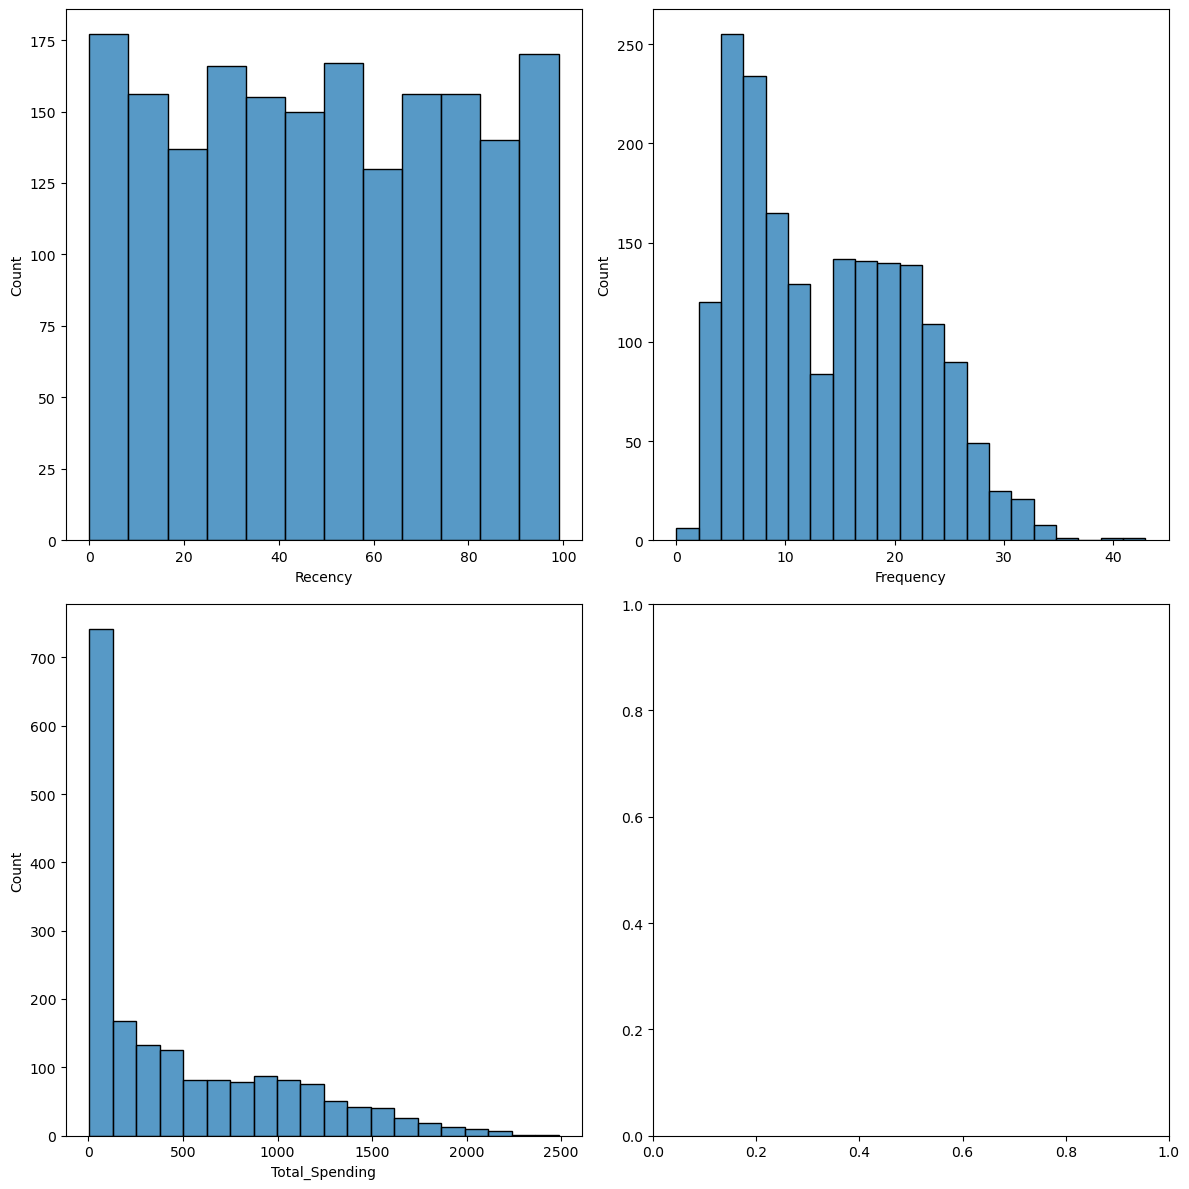

In [39]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot histograms for each RFM column
sns.histplot(df['Recency'], ax=axs[0, 0])
sns.histplot(df['Frequency'], ax=axs[0, 1])
sns.histplot(df['Total_Spending'], ax=axs[1, 0])

# Show the plot
plt.tight_layout()
plt.show()

## Preprocessing data for K-mean Clustering

In [40]:
#Managing Skewed variable

# Apply log transformation to Frequency and Total_Spending
df['Frequency_log'] = np.log(df['Frequency'] + 1)
df['Total_Spending_log'] = np.log(df['Total_Spending'] + 1)

In [42]:
#Normalizing Data

from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df_scaled = scaler.fit_transform(df[['Recency', 'Frequency_log', 'Total_Spending_log']])

# Convert the scaled data back to a Pandas dataframe
df_scaled = pd.DataFrame(df_scaled, columns=['Recency_scaled', 'Frequency_log_scaled', 'Total_Spending_log_scaled'])

In [43]:
df_scaled.head()

,Recency_scaled,Frequency_log_scaled,Total_Spending_log_scaled
0,-1.68577,0.675202,0.668249
1,-1.68577,-0.146897,0.087037
2,-1.68577,-1.713103,-2.044535
3,-1.68577,-0.661558,-0.618446
4,-1.68577,0.578476,1.175603


## Defining the number of clusters

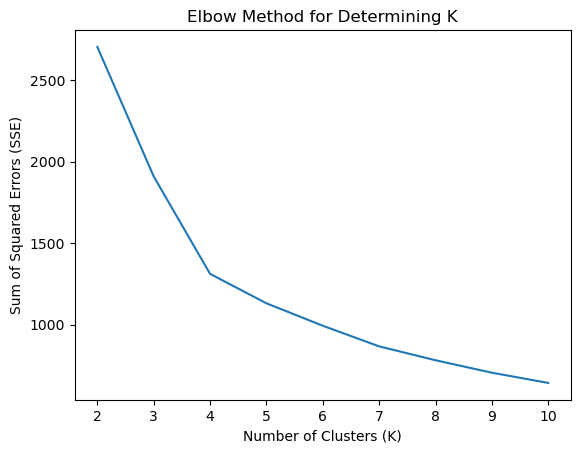

In [46]:
from sklearn.cluster import KMeans

# Define the range of K values to test
K_values = range(2, 11)

# Initialize an empty list to store the sum of squared errors (SSE)
sse_values = []

# Iterate over the range of K values
for K in K_values:
    # Create a KMeans model with the current value of K
    kmeans = KMeans(n_clusters=K)
    
    # Fit the model to the scaled data
    kmeans.fit(df_scaled)
    
    # Calculate the sum of squared errors (SSE) for the current model
    sse = kmeans.inertia_
    
    # Append the SSE value to the list
    sse_values.append(sse)

# Plot the SSE values against the range of K values
plt.plot(K_values, sse_values)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Determining K')
plt.show()

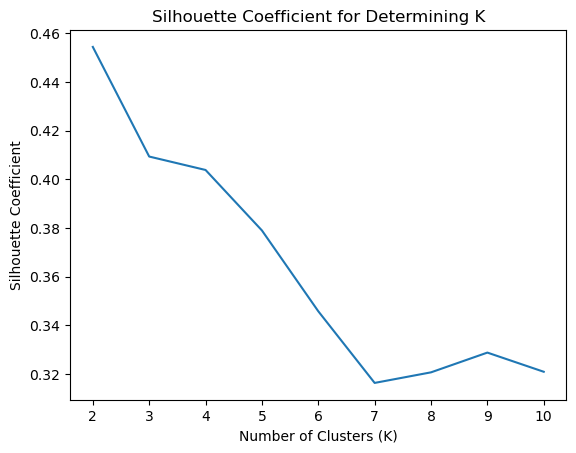

In [48]:
from sklearn.metrics import silhouette_score

# Define the range of K values to test
K_values = range(2, 11)

# Initialize empty lists to store the Silhouette Coefficient values and the corresponding K values
silhouette_values = []
k_values = []

# Iterate over the range of K values
for K in K_values:
    # Create a KMeans model with the current value of K
    kmeans = KMeans(n_clusters=K)
    
    # Fit the model to the scaled data
    kmeans.fit(df_scaled)
    
    # Calculate the Silhouette Coefficient for the current model
    silhouette = silhouette_score(df_scaled, kmeans.labels_)
    
    # Append the Silhouette Coefficient value and the corresponding K value to the lists
    silhouette_values.append(silhouette)
    k_values.append(K)

# Plot the Silhouette Coefficient values against the range of K values
plt.plot(k_values, silhouette_values)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient for Determining K')
plt.show()

In [50]:
kmeans = KMeans(n_clusters = 4, random_state=42)
kmeans.fit(df_scaled)
cluster_labels = kmeans.labels_

In [52]:
df_rfm_k4 = df.assign(cluster=cluster_labels)

df_rfm_k4.groupby('cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Total_Spending': ['mean', 'count']
}).round(0)

Recency Frequency Total_Spending      
           mean      mean           mean count
cluster                                       
0          23.0      20.0          834.0   499
1          25.0       7.0           65.0   440
2          75.0       7.0           78.0   414
3          74.0      20.0          866.0   507

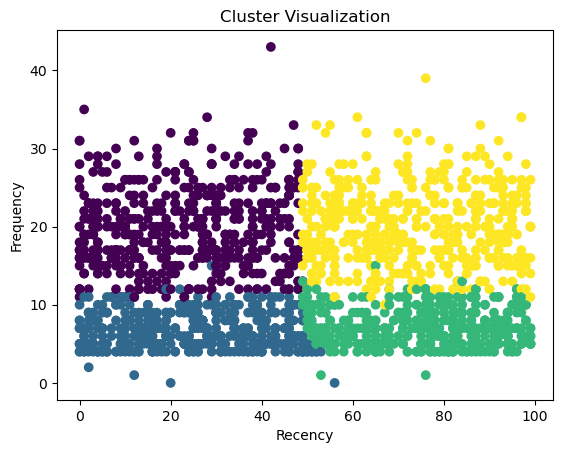

In [53]:
plt.scatter(df_rfm_k4['Recency'], df_rfm_k4['Frequency'], c=df_rfm_k4['cluster'])
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Cluster Visualization')
plt.show()

## Analyzing result of cluster

Cluster 0:

- Mean Recency: 23 days
- Mean Frequency: 20 purchases
- Mean Total Spending: $834
- Count: 499 customers

This cluster represents customers who have made recent purchases (23 days), have a high purchase frequency (20), and spend a significant amount ($834). This cluster can be considered as the "High-Value" customers.

Cluster 1:

- Mean Recency: 25 days
- Mean Frequency: 7 purchases
- Mean Total Spending: $65
- Count: 440 customers

This cluster represents customers who have made relatively recent purchases (25 days), have a moderate purchase frequency (7), and spend a relatively low amount ($65). This cluster can be considered as the "Moderate-Value" customers.

Cluster 2:

- Mean Recency: 75 days
- Mean Frequency: 7 purchases
- Mean Total Spending: $78
- Count: 414 customers

This cluster represents customers who have not made recent purchases (75 days), have a moderate purchase frequency (7), and spend a relatively low amount ($78). This cluster can be considered as the "Inactive" customers.

Cluster 3:

- Mean Recency: 74 days
- Mean Frequency: 20 purchases
- Mean Total Spending: $866
- Count: 507 customers

This cluster represents customers who have not made recent purchases (74 days), have a high purchase frequency (20), and spend a significant amount ($866). This cluster can be considered as the "Loyal" customers.

## Recommendation


 Targeted marketing strategies

Based on the cluster analysis results, here are some targeted marketing strategy recommendations for each cluster:

Cluster 0: High-Value Customers

- Loyalty Program: Implement a loyalty program that rewards customers for their repeat purchases and high spending.
- Personalized Offers: Send personalized offers and promotions based on their purchase history and preferences.
- Exclusive Events: Invite them to exclusive events, such as early access to new products or VIP sales.
- Priority Customer Support: Provide priority customer support to ensure their issues are resolved quickly and efficiently.

Cluster 1: Moderate-Value Customers

- Win-Back Campaigns: Launch win-back campaigns to re-engage customers who have not made a purchase in a while.
- Special Promotions: Offer special promotions and discounts to encourage them to make a purchase.
- Email Nurture Campaigns: Create email nurture campaigns to educate them about new products and services.
- Social Media Engagement: Engage with them on social media to build brand awareness and encourage loyalty.

Cluster 2: Inactive Customers

- Reactivation Campaigns: Launch reactivation campaigns to re-engage customers who have not made a purchase in a long time.
- Survey and Feedback: Send surveys and feedback requests to understand why they have become inactive.
- Win-Back Offers: Offer win-back offers and discounts to encourage them to make a purchase.
- Remove from Email List: If customers remain inactive after multiple reactivation attempts, consider removing them from your email list.

Cluster 3: Loyal Customers

- Exclusive Offers: Offer exclusive deals and promotions to loyal customers to reward their loyalty.
- Early Access: Provide early access to new products and services to loyal customers.
- VIP Events: Invite loyal customers to VIP events, such as product launches and exclusive sales.
- Personalized Communication: Send personalized communication, such as birthday greetings and anniversary messages, to loyal customers.


## Insight from the Exploratory analysis
Exploring the data set helps the company understand their target customer. By gaining a deeper understanding of their existing customers, the company can:

Find new customers who share similar characteristics with their existing customers and,

Create marketing campaigns that resonate with their target audience and increase the likelihood of acquiring new customers.

From the above exploratory analysis the following marketing strategy is recommended:

Although majority of the company customer age range between 35 and 54 their high spending customer range between the age 18 and 34, so it is recommended that the company increases target marketing strategy toward the age range 18 and 34 to increase it high value customer While also targeting the age between 35 and 54

Invest in improving the in-store experience, as it is the most preferred channel. Also, since web purchases are significant but lower than store purchases, consider enhancing the online shopping experience to capture more web purchases, considering strategies like discounts, improved usability, and free delivery incentives.

Segment the audience based on historical campaign responses and spending patterns. Retarget customers who have previously engaged positively with campaigns, as they are more likely to convert again, while analyze the characteristics of non-responders to understand why they are less engaged, design new campaigns that address their preferences, use A/B testing for future campaigns to refine messaging, channels, and timing, ensuring higher response rates and ROI

